In [71]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [3]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [4]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [5]:
from utils import style, hdi, find_max, load_spectral_types

In [6]:
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [7]:
style(name="seaborn-notebook")

In [8]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [9]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [10]:
eff_vol = glob(join(root_data_dir, 'Effective-Volume-no', "z*"))
eff_vol.sort()
eff_vol

['/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.36)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.37)_(0.39).hdf5',
 '/home2/s20321

In [11]:
import re
c1, c2 = [], []
# get the value between () of the file name
for f in eff_vol:
    c1.append(float(re.findall(r'\((.*?)\)', f)[0]))
    c2.append(float(re.findall(r'\((.*?)\)', f)[1]))
c1 = np.array(c1)
c2 = np.array(c2)
c = 0.5*(c1+c2)
c

array([0.   , 0.13 , 0.18 , 0.215, 0.245, 0.27 , 0.29 , 0.31 , 0.33 ,
       0.35 , 0.365, 0.38 , 0.395])

In [12]:
mcmc_dm_dir = join(root_data_dir, "MCMC-no", "dm", "data")
mcmc_dm_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data'

In [13]:
dm_2_files = glob(join(mcmc_dm_dir, "chain-2-*"))
dm_2_files.sort()
dm_2_files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-2-00.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-2-01.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-2-02.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-2-03.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-2-04.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-2-05.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-2-06.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-2-07.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-2-08.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-2-09.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-2-10.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-2-11.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-2-12.npy']

## tes

In [14]:
index = 0
print(f"chain-2-{index:02d}.npy")

chain-2-00.npy


In [15]:
index = 1
df = np.load(join(mcmc_dm_dir, f"chain-2-{index:02d}.npy"))
df.shape

(20000, 68, 33)

In [16]:
rhob = df[:, :, :12]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
rhoDM = df[:, :, 24].reshape(-1)/1E-2
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2

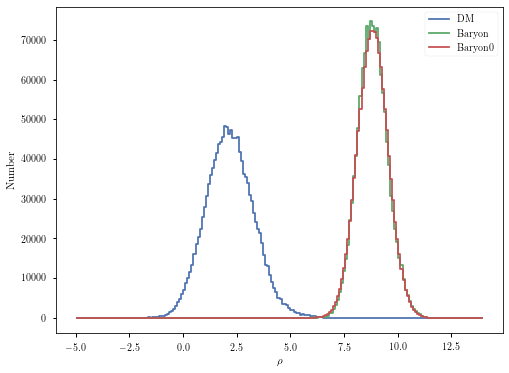

In [17]:
rho = np.linspace(-5, 14, 200)
rhoDM_num, _ = np.histogram(rhoDM, bins=rho)
rhob_num, _ = np.histogram(rhob, bins=rho)
rhob0_num, _ = np.histogram(rhob0, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoDM_num, label='DM')
ax.step(rhomid, rhob_num, label='Baryon')
ax.step(rhomid, rhob0_num, label='Baryon0')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

In [18]:
rhoDM_sample = np.random.choice(rhoDM, size=2000, replace=False)
rhoDM_fit = skewnorm.fit(rhoDM_sample)
rhob_sample = np.random.choice(rhob, size=2000, replace=False)
rhob_fit = skewnorm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=2000, replace=False)
rhob0_fit = norm.fit(rhob0_sample)

((1.2397627967536695, 1.294579773660702, 1.4439007155154926),
 (1.1235019271937041, 8.3605872270923, 0.8572679424757477),
 (8.89462869789603, 0.6989562719877461))

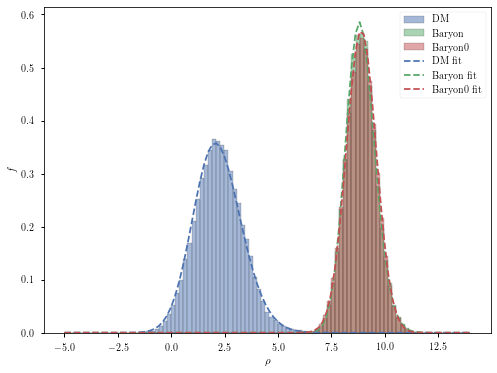

In [19]:
# plot
rho = np.linspace(-5, 14, 100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoDM, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoDM_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
rhoDM_fit, rhob_fit, rhob0_fit

rhoDM = 2.06 +1.17/-1.07
rhob = 8.81 +0.70/-0.67
rhob0 = 8.89 +0.71/-0.70


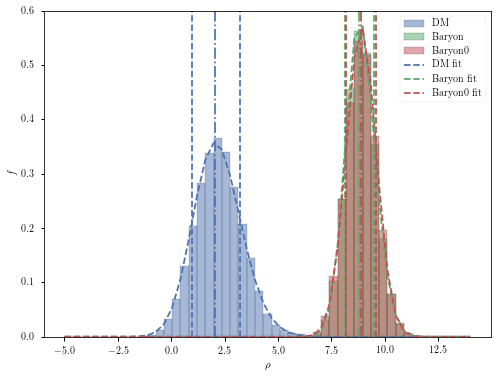

In [20]:
rhoDM_low, rhoDM_high = hdi(lambda x: skewnorm.pdf(x, *rhoDM_fit), perc=0.68, res=1E3, min=-5, max=14)
rhoDM_mode = find_max(lambda x: skewnorm.pdf(x, *rhoDM_fit), x0=0.0)[0]

rhob_low, rhob_high = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), perc=0.68, res=1E3, min=-5, max=14)
rhob_mode = find_max(lambda x: skewnorm.pdf(x, *rhob_fit), x0=0.0)[0]

rhob0_low, rhob0_high = hdi(lambda x: norm.pdf(x, *rhob0_fit), perc=0.68, res=1E3, min=-5, max=14)
rhob0_mode = find_max(lambda x: norm.pdf(x, *rhob0_fit), x0=0.0)[0]

# plot
rho = np.linspace(-5, 14, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoDM, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoDM_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhoDM_mode, color='C0', ls='-.')
ax.axvline(rhob_mode, color='C1', ls='-.')
ax.axvline(rhob0_mode, color='C2', ls='-.')
ax.axvline(rhoDM_low, color='C0', ls='--')
ax.axvline(rhoDM_high, color='C0', ls='--')
ax.axvline(rhob_low, color='C1', ls='--')
ax.axvline(rhob_high, color='C1', ls='--')
ax.axvline(rhob0_low, color='C2', ls='--')
ax.axvline(rhob0_high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhoDM = {rhoDM_mode:.02f} +{rhoDM_high-rhoDM_mode:.02f}/-{rhoDM_mode-rhoDM_low:.02f}')
print(f'rhob = {rhob_mode:.02f} +{rhob_high-rhob_mode:.02f}/-{rhob_mode-rhob_low:.02f}')
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low:.02f}')

rhob0 = 8.89 +0.71/-0.71


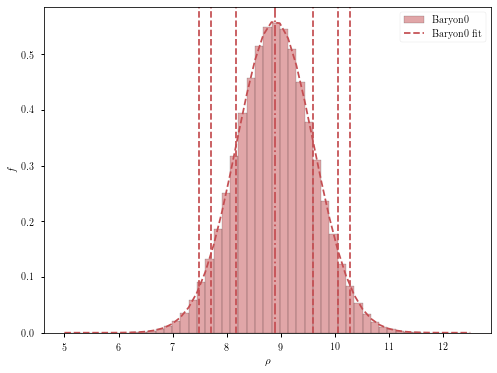

In [21]:
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2
# fit with gaussian
rhob0_fit = norm.fit(rhob0)
# mode
rhob0_mode = find_max(lambda x: norm.pdf(x, *rhob0_fit), x0=0.0)[0]
# find 
sigma_1 = 68/100
sigma_2 = 90/100
sigma_3 = 95/100
rhob0_low = {}
rhob0_high = {}
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: norm.pdf(x, *rhob0_fit), perc=sigma, res=1E3, min=5, max=13)
    rhob0_low[i] = low
    rhob0_high[i] = high
# plot
rho = np.linspace(5, 12.5, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhob0_mode, color='C2', ls='-.')
for i in range(3):
    ax.axvline(rhob0_low[i], color='C2', ls='--')
    ax.axvline(rhob0_high[i], color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high[0]-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low[0]:.02f}')

In [54]:
from tqdm import tqdm

rhoDM_modes = []
rhoDM_errs = []
rhob_modes = []
rhob_errs = []
rhoDM_fits = []

for index in tqdm(range(len(dm_2_files))):
    df = np.load(dm_2_files[index])
    rhob = df[:, :, :12]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    rhoDM = df[:, :, 24].reshape(-1)/1E-2
    print("fitting...")
    rhoDM_sample = np.random.choice(rhoDM, size=2000, replace=False)
    rhoDM_fit = skewnorm.fit(rhoDM_sample)
    rhoDM_fits.append(rhoDM_fit)
    rhob_sample = np.random.choice(rhob, size=2000, replace=False)
    rhob_fit = skewnorm.fit(rhob_sample)
    print("calculating HDI...")
    rhoDM_err = []
    rhob_err = []
    for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
        low, high = hdi(lambda x: skewnorm.pdf(x, *rhoDM_fit), perc=sigma, res=1E3, min=-5, max=15)
        rhoDM_err.append({'sigma':sigma, 'low': low, 'high': high})
        low, high = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), perc=sigma, res=1E3, min=5, max=13)
        rhob_err.append({'sigma':sigma, 'low': low, 'high': high})
    rhoDM_errs.append(rhoDM_err)
    rhob_errs.append(rhob_err)
    print("calculating mode")
    rhoDM_mode = find_max(lambda x: skewnorm.pdf(x, *rhoDM_fit), x0=0.0)[0]
    rhob_mode = find_max(lambda x: skewnorm.pdf(x, *rhob_fit), x0=0.0)[0]
    rhoDM_modes.append(rhoDM_mode)
    rhob_modes.append(rhob_mode)

  0%|          | 0/13 [00:00<?, ?it/s]

fitting...
calculating HDI...


  8%|▊         | 1/13 [00:02<00:29,  2.45s/it]

calculating mode
fitting...
calculating HDI...


 15%|█▌        | 2/13 [00:04<00:25,  2.36s/it]

calculating mode
fitting...
calculating HDI...


 23%|██▎       | 3/13 [00:07<00:23,  2.32s/it]

calculating mode
fitting...
calculating HDI...


 31%|███       | 4/13 [00:09<00:20,  2.28s/it]

calculating mode
fitting...
calculating HDI...


 38%|███▊      | 5/13 [00:11<00:18,  2.36s/it]

calculating mode
fitting...
calculating HDI...


 46%|████▌     | 6/13 [00:14<00:16,  2.39s/it]

calculating mode
fitting...
calculating HDI...


 54%|█████▍    | 7/13 [00:16<00:14,  2.36s/it]

calculating mode
fitting...
calculating HDI...


 62%|██████▏   | 8/13 [00:18<00:11,  2.39s/it]

calculating mode
fitting...
calculating HDI...


 69%|██████▉   | 9/13 [00:21<00:09,  2.33s/it]

calculating mode
fitting...
calculating HDI...


 77%|███████▋  | 10/13 [00:24<00:07,  2.55s/it]

calculating mode
fitting...
calculating HDI...


 85%|████████▍ | 11/13 [00:27<00:05,  2.63s/it]

calculating mode
fitting...
calculating HDI...


 92%|█████████▏| 12/13 [00:29<00:02,  2.50s/it]

calculating mode
fitting...
calculating HDI...


100%|██████████| 13/13 [00:31<00:00,  2.42s/it]

calculating mode


In [55]:
rhoDM_fits

[(0.695677973431743, 0.4500761884183119, 1.052280778367636),
 (0.9132455357782334, 1.5018670202767506, 1.307444394204507),
 (5.063622607504244e-05, 2.3798578212686676, 0.9946784835497302),
 (0.45479639509748054, 3.5184061341459443, 0.9795290478337861),
 (0.43156783686978073, 4.594027068714619, 0.9825717792242635),
 (0.665933524579071, 2.2059714707838376, 0.9902492231178126),
 (0.0003756599052529173, 1.4066023971632835, 0.7139793577710569),
 (-0.6930588653290302, 1.402531549785503, 0.7169360931002235),
 (1.5900720149509842, 0.058763760000210837, 0.98262935037733),
 (3.054983576032417, -0.9427379096754017, 1.2836429270853995),
 (3.0349040460230503, -0.5273731256871779, 1.3742494034071302),
 (0.5976113571451427, -0.13321755130552967, 0.6508363026325042),
 (1.705369649608296, 0.6513862336688756, 1.1657000158395698)]

(-2.0, 3.0)

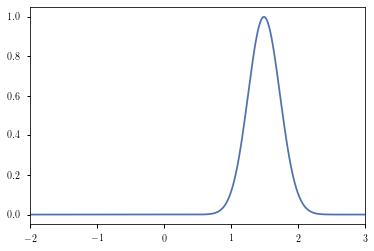

In [56]:
# multiplying the rhoDM, but it became addition in log
rho = np.linspace(-5, 14, 10000)
log_rhoDM = None
for p in rhoDM_fits:
    if log_rhoDM is None:
        log_rhoDM = skewnorm.logpdf(rho, *p)
    else:
        log_rhoDM += skewnorm.logpdf(rho, *p)
# turn into rhoDM
rhoDM_com = np.exp(log_rhoDM)
# normalize with max value
rhoDM_com /= rhoDM_com.max()
# plot
fig, ax = plt.subplots()
ax.plot(rho, rhoDM_com, label='rhoDM')
ax.set_xlim(-2,3)

In [57]:
def skewpdf(x, *args):
    A, other = args[0], args[1:]
    return A*skewnorm.pdf(x, *other)

rhoDM_com_fit, _ = curve_fit(skewpdf, rho, rhoDM_com, p0=[1, 1.0, 2.0, 1])
rhoDM_com_fit

array([0.5977679 , 0.48791703, 1.40125568, 0.25466588])

(-2.0, 3.0)

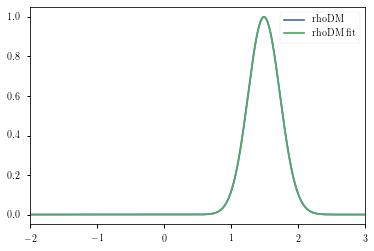

In [58]:
plt.plot(rho, rhoDM_com, label='rhoDM')
plt.plot(rho, skewpdf(rho, *rhoDM_com_fit), label='rhoDM fit')
plt.legend()
plt.xlim(-2,3)

In [59]:
rhoDM_com_err = []
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: skewpdf(x, *rhoDM_com_fit), perc=sigma, res=1E3, min=-1, max=3)
    rhoDM_com_err.append({'sigma':sigma, 'low': low, 'high': high})
rhoDM_com_mode = find_max(lambda x: skewpdf(x, *rhoDM_com_fit), x0=0.0)[0]
rhoDM_com_mode, rhoDM_com_err

(1.4876875000000016,
 [{'sigma': 0.68, 'low': 1.2502502502502502, 'high': 1.7267267267267266},
  {'sigma': 0.9, 'low': 1.0980980980980979, 'high': 1.8828828828828827},
  {'sigma': 0.95, 'low': 1.0220220220220222, 'high': 1.9589589589589589}])

In [60]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

In [61]:
# for i in range(len(c)):
#     print(r"${}\leq c < {}$ & {:.02f} & [{:.02f},{:.02f}] & [{:.02f},{:.02f}] & [{:.02f},{:.02f}] \\".format(c1[i], c2[i], rhoDM_mode[i], rhoDM_low68[i], rhoDM_high68[i], rhoDM_low90[i], rhoDM_high90[i], rhoDM_low95[i], rhoDM_high95[i]))

In [62]:
c

array([0.   , 0.13 , 0.18 , 0.215, 0.245, 0.27 , 0.29 , 0.31 , 0.33 ,
       0.35 , 0.365, 0.38 , 0.395])

In [66]:
i = 0
np.array([err[i]['low'] for err in rhoDM_errs])

array([-0.01501502,  1.06606607,  1.38638639,  2.90790791,  3.96896897,
        1.74674675,  0.70570571,  0.44544545, -0.07507508, -0.95595596,
       -0.55555556, -0.45545546,  0.52552553])

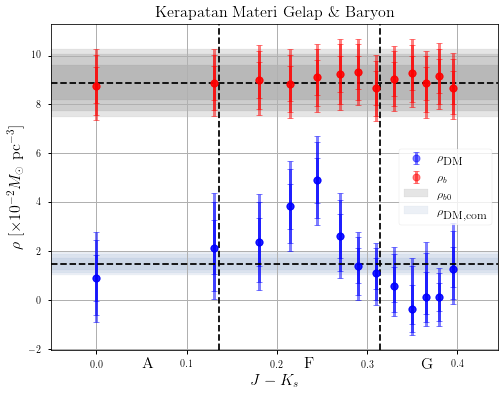

1.4876875000000016

In [76]:
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err[i]['low'] for err in rhoDM_errs])
    high = np.array([err[i]['high'] for err in rhoDM_errs])
    dm_ax = ax.errorbar(c, rhoDM_modes, yerr=[rhoDM_modes-low, high-rhoDM_modes], fmt='o', color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([err[i]['low'] for err in rhob_errs])
    high = np.array([err[i]['high'] for err in rhob_errs])
    rhob_ax = ax.errorbar(c, rhob_modes, yerr=[rhob_modes-low, high-rhob_modes], fmt='o', color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    rhob0_ax = ax.fill_between(cs, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    rhoDM_com_ax = ax.fill_between(cs, rhoDM_com_err[i]['low'], rhoDM_com_err[i]['high'], color='C0', alpha=0.1)
    if i == 2:
        ax.legend([dm_ax, rhob_ax, rhob0_ax, rhoDM_com_ax], 
                  [r'$\rho_{\textup{DM}}$', r'$\rho_{b}$', r'$\rho_{b0}$', r'$\rho_{\textup{DM,com}}$'],
                  loc='best', fontsize=12)
# real value
ax.axhline(y=rhoDM_com_mode, color='black', linestyle='--')
ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.text(0.05, -2.8, r'$\textup{A}$', fontsize=16)
ax.text(0.23, -2.8, r'$\textup{F}$', fontsize=16)
ax.text(0.36, -2.8, r'$\textup{G}$', fontsize=16)
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
ax.grid()
fig.savefig(join('img', 'rhoDM-dm.pdf'), dpi=70)
plt.show()
rhoDM_com_mode

# No F

In [69]:
rhoDM_errs_nof = np.append(rhoDM_errs[:2], rhoDM_errs[7:], axis=0)
rhob_errs_nof = np.append(rhob_errs[:2], rhob_errs[7:], axis=0)
rhoDM_modes_nof = np.append(rhoDM_modes[:2], rhoDM_modes[7:], axis=0)
rhob_modes_nof = np.append(rhob_modes[:2], rhob_modes[7:], axis=0)
rhoDM_fits_nof = np.append(rhoDM_fits[:2], rhoDM_fits[7:], axis=0)

(-2.0, 3.0)

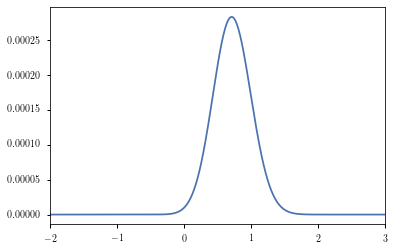

In [70]:
# multiplying the rhoDM, but it became addition in log
rho = np.linspace(-5, 14, 10000)
log_rhoDM_nof = None
for p in rhoDM_fits_nof:
    if log_rhoDM_nof is None:
        log_rhoDM_nof = skewnorm.logpdf(rho, *p)
    else:
        log_rhoDM_nof += skewnorm.logpdf(rho, *p)
# turn into rhoDM
rhoDM_com_nof = np.exp(log_rhoDM_nof)
# normalize with max value
rhoDM_com_nof /= rhoDM_com.max()
# plot
fig, ax = plt.subplots()
ax.plot(rho, rhoDM_com_nof, label='rhoDM')
ax.set_xlim(-2,3)

In [72]:
def skewpdf(x, *args):
    A, other = args[0], args[1:]
    return A*skewnorm.pdf(x, *other)

rhoDM_com_fit_nof, _ = curve_fit(skewpdf, rho, rhoDM_com_nof, p0=[1, 1.0, 2.0, 1])
rhoDM_com_fit_nof

array([2.00510430e-04, 7.18435409e-01, 5.67728842e-01, 3.19791796e-01])

(-2.0, 3.0)

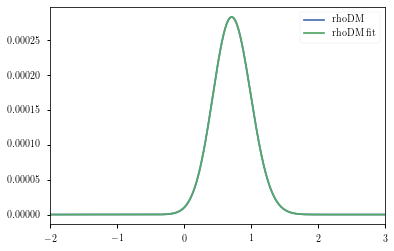

In [73]:
plt.plot(rho, rhoDM_com_nof, label='rhoDM')
plt.plot(rho, skewpdf(rho, *rhoDM_com_fit_nof), label='rhoDM fit')
plt.legend()
plt.xlim(-2,3)

In [74]:
rhoDM_com_err_nof = []
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: skewpdf(x, *rhoDM_com_fit_nof), perc=sigma, res=1E3, min=-1, max=3)
    rhoDM_com_err_nof.append({'sigma':sigma, 'low': low, 'high': high})
rhoDM_com_mode_nof = find_max(lambda x: skewpdf(x, *rhoDM_com_fit_nof), x0=0.0)[0]
rhoDM_com_mode_nof, rhoDM_com_err_nof

(0.7076875000000008,
 [{'sigma': 0.68, 'low': 0.4294294294294294, 'high': 0.9939939939939939},
  {'sigma': 0.9, 'low': 0.2492492492492493, 'high': 1.1821821821821823},
  {'sigma': 0.95, 'low': 0.1611611611611612, 'high': 1.274274274274274}])

In [75]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

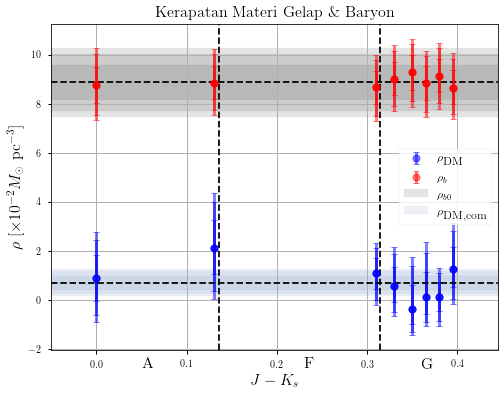

0.7076875000000008

In [80]:
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)
c_nof = np.append(c[:2], c[7:])

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err[i]['low'] for err in rhoDM_errs_nof])
    high = np.array([err[i]['high'] for err in rhoDM_errs_nof])
    dm_ax = ax.errorbar(c_nof, rhoDM_modes_nof, yerr=[rhoDM_modes_nof-low, high-rhoDM_modes_nof], fmt='o', color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([err[i]['low'] for err in rhob_errs_nof])
    high = np.array([err[i]['high'] for err in rhob_errs_nof])
    rhob_ax = ax.errorbar(c_nof, rhob_modes_nof, yerr=[rhob_modes_nof-low, high-rhob_modes_nof], fmt='o', color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    rhob0_ax = ax.fill_between(cs, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    rhoDM_com_ax = ax.fill_between(cs, rhoDM_com_err_nof[i]['low'], rhoDM_com_err_nof[i]['high'], color='C0', alpha=0.1)
    if i == 2:
        ax.legend([dm_ax, rhob_ax, rhob0_ax, rhoDM_com_ax], 
                  [r'$\rho_{\textup{DM}}$', r'$\rho_{b}$', r'$\rho_{b0}$', r'$\rho_{\textup{DM,com}}$'],
                  loc='best', fontsize=12)
# real value
ax.axhline(y=rhoDM_com_mode_nof, color='black', linestyle='--')
ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.text(0.05, -2.8, r'$\textup{A}$', fontsize=16)
ax.text(0.23, -2.8, r'$\textup{F}$', fontsize=16)
ax.text(0.36, -2.8, r'$\textup{G}$', fontsize=16)
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
ax.grid()
fig.savefig(join('img', 'rhoDM-dm-nof.pdf'), dpi=70)
plt.show()
rhoDM_com_mode_nof

# MOCK